### Histogram
Image histogram counts the number of pixels with a specific colour.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
from time import time

Let's load an example image.

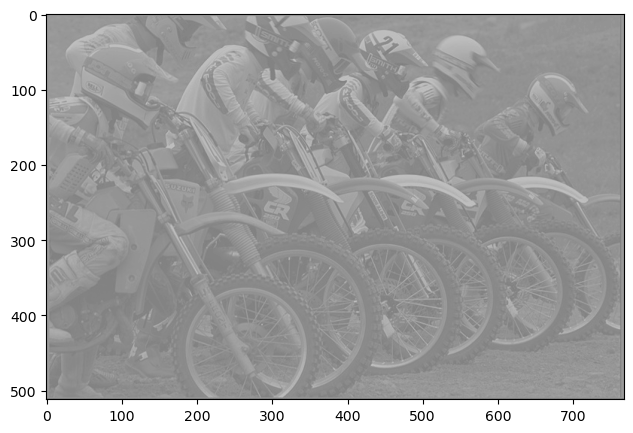

In [2]:
img = cv2.imread('data/kodim05.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)

Let's now compute the histogram by counting the number of pixels for each colour.

Elapsed time: 0.1729891300201416


(Text(0.5, 0, 'Pixel color'), Text(0, 0.5, 'Number of pixels'))

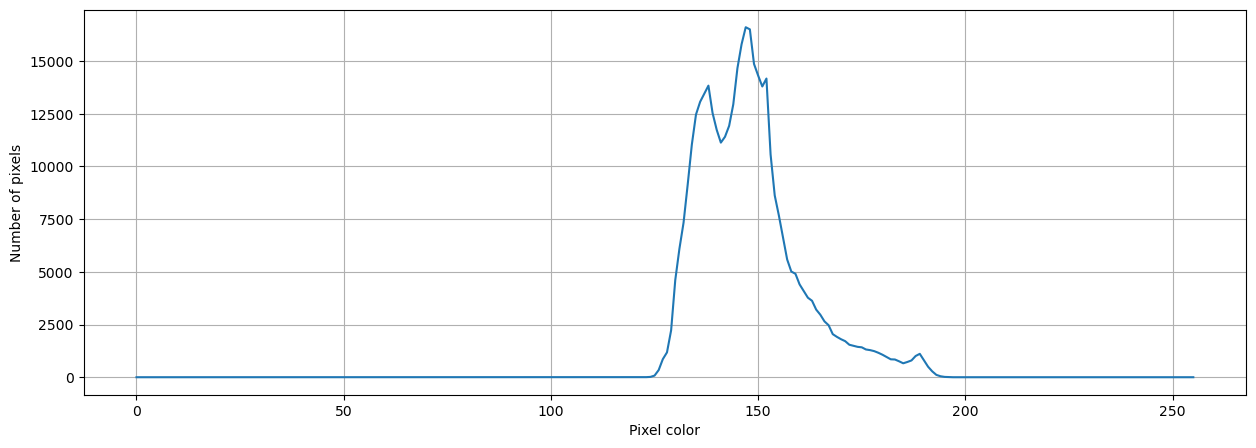

In [3]:
start = time()
rows, cols = img.shape
hist = np.zeros(256)
for r in range(rows):
    for c in range(cols):
        hist[img[r,c]] = hist[img[r,c]] + 1
print('Elapsed time:', time() - start)
plt.plot(np.arange(0, 256), hist)
plt.grid(True)
plt.xlabel('Pixel color'), plt.ylabel('Number of pixels')

### Histogram Equalization
The transformation function for histogram equalization is the cumulative distribution function (CDF). CDF is computed from image histogram.

(Text(0.5, 0, 'Pixel color'), Text(0, 0.5, 'CDF'))

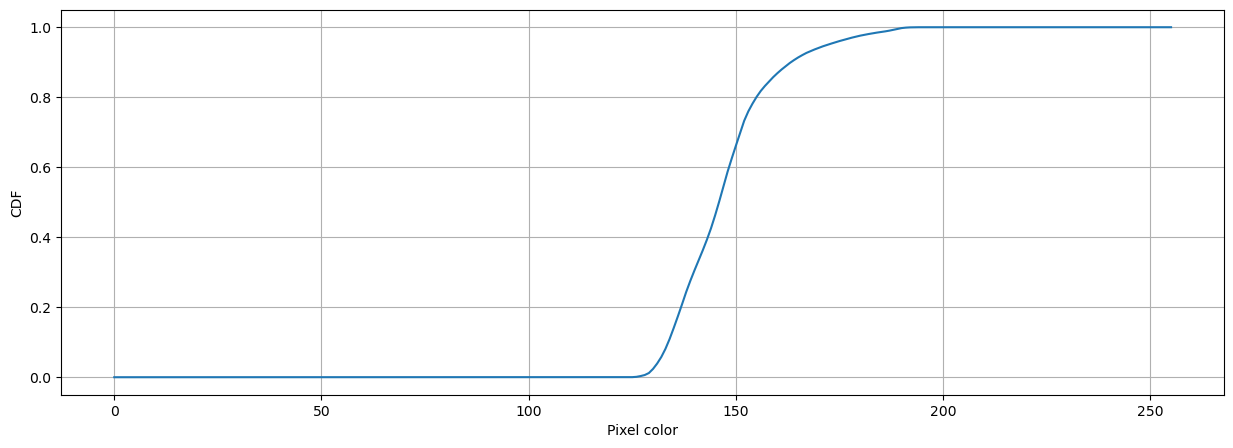

In [4]:
cdf = np.zeros(256)
for idx, h in enumerate(hist):
    cdf[idx] = np.sum(hist[0:idx+1])
cdf = cdf/np.sum(hist)
plt.plot(cdf), plt.grid(True)
plt.xlabel('Pixel color'), plt.ylabel('CDF')

(<Axes: >, <matplotlib.image.AxesImage at 0x781fea69a790>)

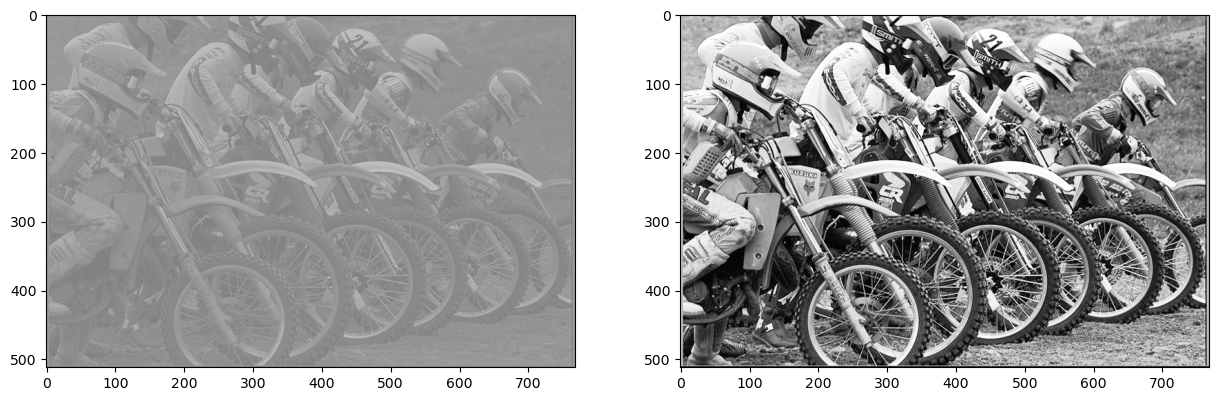

In [5]:
equalized = np.zeros((rows, cols), dtype=np.uint8)
for r in range(rows):
    for c in range(cols):
        equalized[r,c] = 255*cdf[img[r,c]]

plt.subplot(121), plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(122), plt.imshow(equalized, cmap='gray', vmin=0, vmax=255)

### Useful Functions
Histogram calculation as well as histogram equalization are available in numpy and/or OpenCV. Let's first start with histogram calculation using numpy.

Elapsed time: 0.010343074798583984


([<matplotlib.lines.Line2D at 0x781fea5f71f0>], None)

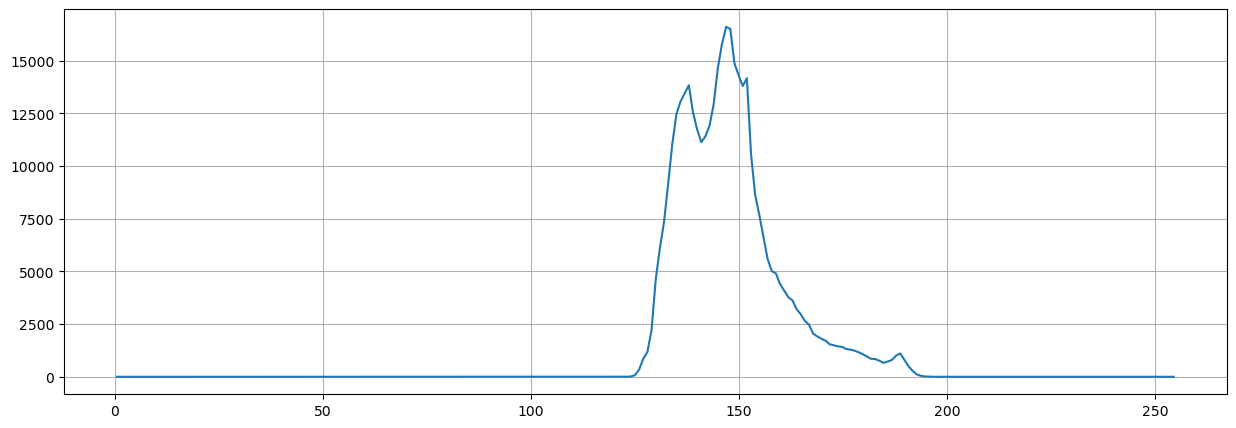

In [6]:
start = time()
hist, bins = np.histogram(img.ravel(), bins=256, range=(0,255))
print('Elapsed time:', time() - start)
plt.plot(bins[0:-1]+0.5, hist), plt.grid(True)

OpenCV includes a function for histogram equalization.

(<Axes: >, <matplotlib.image.AxesImage at 0x781fea506790>)

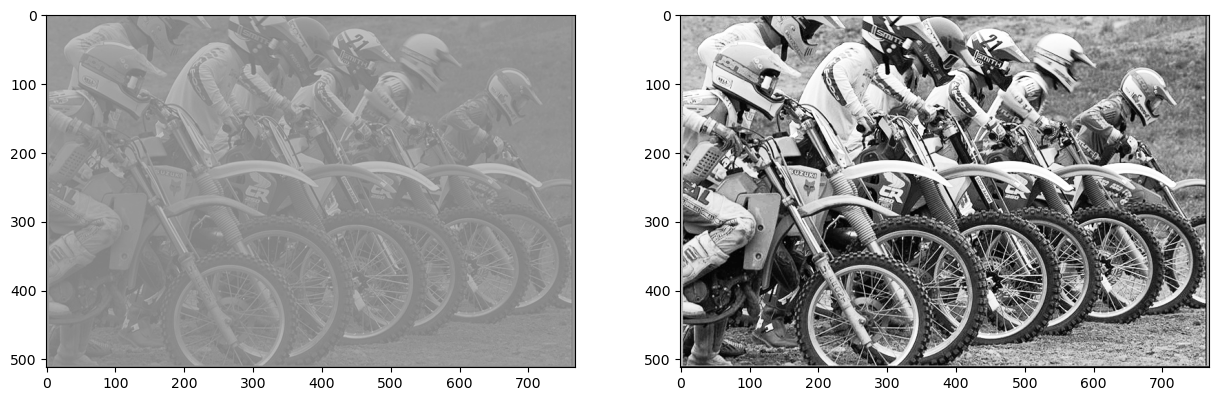

In [7]:
dst = cv2.equalizeHist(img)
plt.subplot(121), plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(122), plt.imshow(dst, cmap='gray', vmin=0, vmax=255)

### Contrast Limited Adaptive Histogram Equalization (CLAHE)
Histogram equalization assumes that an image with good contrast shall have "flat" pdf. However, this is not always true. The image below shows a dark tire and histogram equalization is too agressive.

(<Axes: >, <matplotlib.image.AxesImage at 0x781fea4f2d00>)

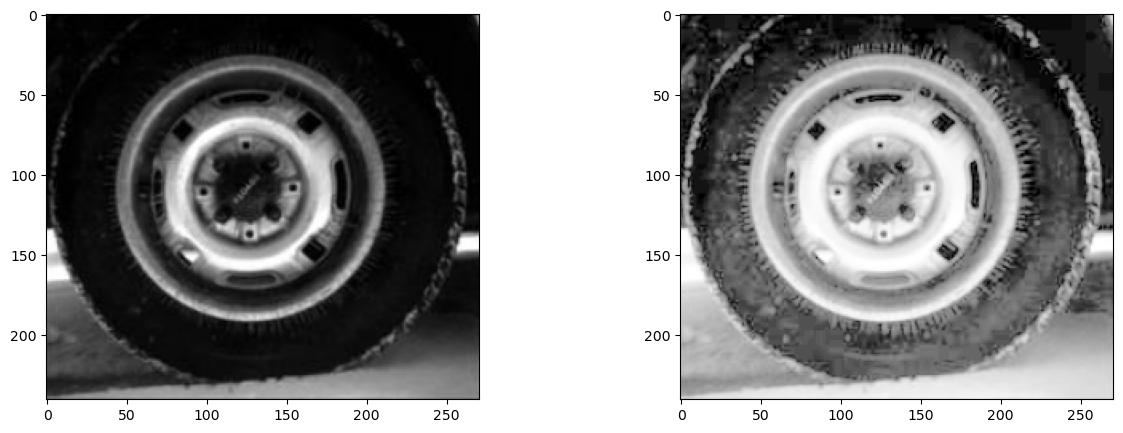

In [8]:
img = cv2.imread('data/tire.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.subplot(121), plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(122), plt.imshow(cv2.equalizeHist(img), cmap='gray', vmin=0, vmax=255)

This happens because the CDF transforms even very dark tones to quite bright levels.

(Text(0.5, 0, 'Input'), Text(0, 0.5, 'Output'))

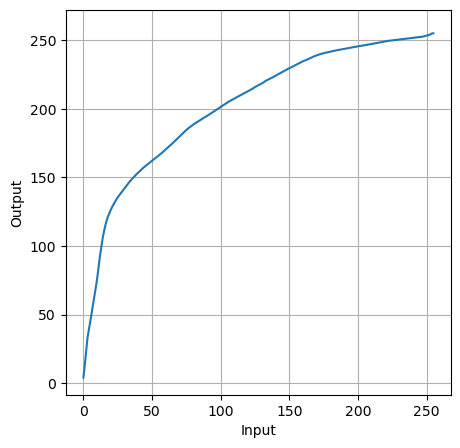

In [9]:
hist, bins = np.histogram(img.ravel(), bins=256, range=(0,255))
cdf = np.cumsum(hist/np.sum(hist))
plt.plot(255*cdf), plt.axis('square'), plt.grid(True)
plt.xlabel('Input'), plt.ylabel('Output')

Contrast limited adaptive histogram equalization clips the transformation "agressivness".

(<Axes: >, <matplotlib.image.AxesImage at 0x781fea2f4490>)

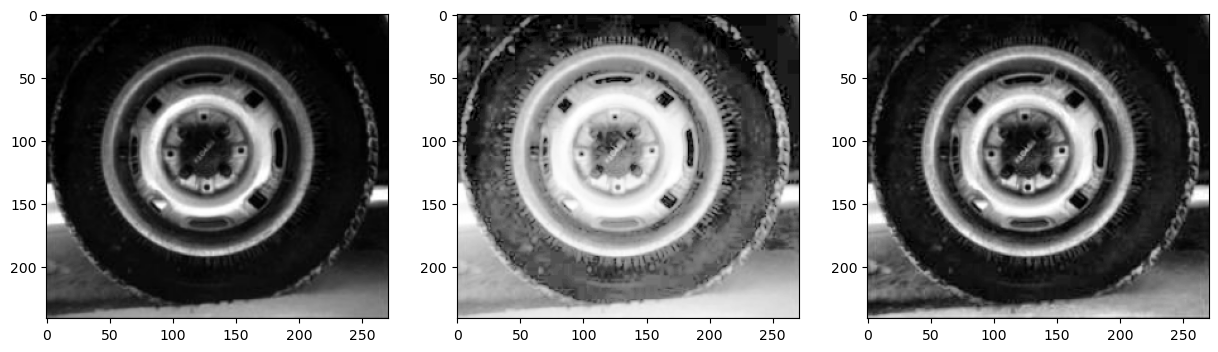

In [10]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

plt.subplot(131), plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.subplot(132), plt.imshow(cv2.equalizeHist(img), cmap='gray', vmin=0, vmax=255)
plt.subplot(133), plt.imshow(clahe.apply(img), cmap='gray', vmin=0, vmax=255)